## Predict the Cost of Homes in California using Linear Regression

This notebook trains a machine learning model that predicts home costs in California.

Objective: Predict the value of home prices using 9 feature variables and 1 target variable.

#### Choose the algorithm

Machine learning technique: Supervised learning 

Algorithm: Linear regression

#### Linear Regression
Linear regression is a machine learning algorthm based on supervised learning. It is mostly used to find the relationship between independent variables (**features** ). It is often used to predict a numeric value called the **target**.

#### Import libraries

1. os and sys libraries are used for root directory path setup
2. pandas & numpy are used for data manipulation
    - pandas is used to work with data-structures, n-dimensional matrices and perform exploratory data analysis
    - numpy is used to work with arrays
3. seaborn and matplotlib are used for visualization
4. scikit-learn is ML library for Machine Learning algoritm (Linear Regression and KNN in this case)

In [174]:
# Path Setup to include project root directory
import os
import sys
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from Data_Preprocessing.Data_Analyzer import DataAnalyzer
from Data_Preprocessing.Data_Cleaner import DataCleaner

# Data manipulation libraries
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

#### Obtain and load the Data

Source: Downloaded from Kaggle [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

About this dataset:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block - How much that house is worth (measured in US Dollars)

10. oceanProximity: Location of the house in proximity to the ocean/sea

**Target Variable**

our **target** is medianHouseValue which is present in the data. 
The target is the most important feature in this dataset because the machine learns how to predict this value.

In this notebook, the machine looks at the other features and learns how to predict the medianHouseValue also called the target

In [175]:
file_path = os.path.join(project_root, 'linear_regression', 'data', 'raw', 'housing.csv')
data_analyzer = DataAnalyzer(file_path)
housing_df = data_analyzer.data
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Exploratory Data Analysis (EDA)

In [176]:
housing_df.info()

data_analyzer.feature_analysis()

num_of_missing_total_bedrooms = housing_df["total_bedrooms"].isnull().sum()
print(f"\nOnly total_bedrooms feature contains {num_of_missing_total_bedrooms} missing values in the dataset. The rest of the features contain no missing values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Dataset Overview:

The data includes 20640 observations and 10 features.

Out of 10 features, 1 are categorical features and 9 are numerical features.
    Categorical features: ['ocean_proximity']
    Numerical features: ['longitude', 'latitude', 'ho

In [177]:
round(housing_df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.570,2.004,-124.35,-121.800,-118.490,-118.010,-114.31
latitude,20640.0,35.632,2.136,32.54,33.930,34.260,37.710,41.95
housing_median_age,20640.0,28.639,12.586,1.00,18.000,29.000,37.000,52.00
total_rooms,20640.0,2635.763,2181.615,2.00,1447.750,2127.000,3148.000,39320.00
total_bedrooms,20433.0,537.871,421.385,1.00,296.000,435.000,647.000,6445.00
population,20640.0,1425.477,1132.462,3.00,787.000,1166.000,1725.000,35682.00
households,20640.0,499.540,382.330,1.00,280.000,409.000,605.000,6082.00
median_income,20640.0,3.871,1.900,0.50,2.563,3.535,4.743,15.00
median_house_value,20640.0,206855.817,115395.616,14999.00,119600.000,179700.000,264725.000,500001.00


In [178]:
numeric_features = data_analyzer.numerical_features
categorical_features = data_analyzer.categorical_features

print(f"Numerical Features: {numeric_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Categorical Features: ['ocean_proximity']


#### Visualization - identify the relationship between each feature or attribute
Visualization helps with underestanding the relationship between the target variable and other features

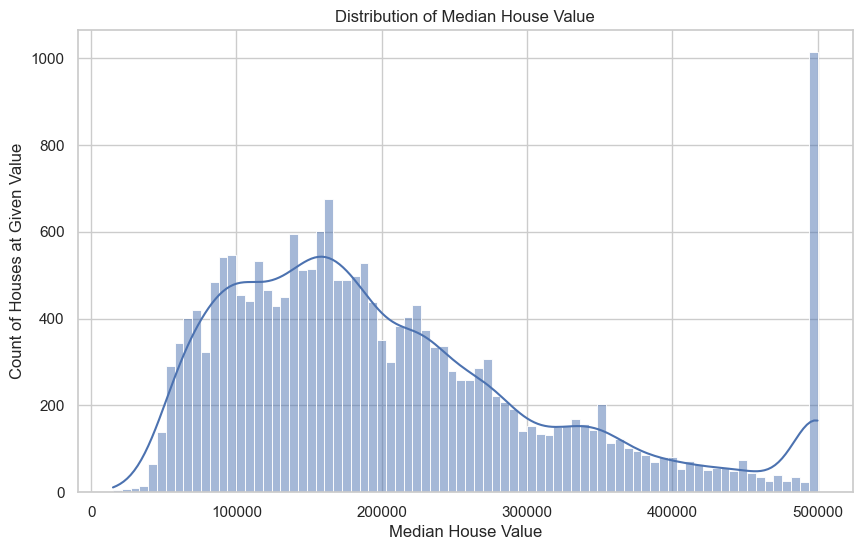

In [179]:
# Plot the distribution of the target variable 'median_house_value' using histogram

plt.figure(figsize=(10, 6))
sns.histplot(housing_df['median_house_value'], bins=80, kde=True) # bins is amount of columns and kde is smoothness
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Count of Houses at Given Value')
plt.show()

In [180]:
print("By looking at the histogram, we can observe the presence of outliers in the 'median_house_value' column, especially at the higher end of the value range. ")
print("This suggests that there are a few houses with significantly higher values compared to the majority, which could potentially skew our regression model if not addressed.")
print("The presence of outliers are evident from the plot that shows a long tail on the right side of the distribution.")
print("From the histogram, it appears that majority of the houses have a median value lower than $500,000, with a noticeable peak around the $100,000 to $200,000 range.")

By looking at the histogram, we can observe the presence of outliers in the 'median_house_value' column, especially at the higher end of the value range. 
This suggests that there are a few houses with significantly higher values compared to the majority, which could potentially skew our regression model if not addressed.
The presence of outliers are evident from the plot that shows a long tail on the right side of the distribution.
From the histogram, it appears that majority of the houses have a median value lower than $500,000, with a noticeable peak around the $100,000 to $200,000 range.


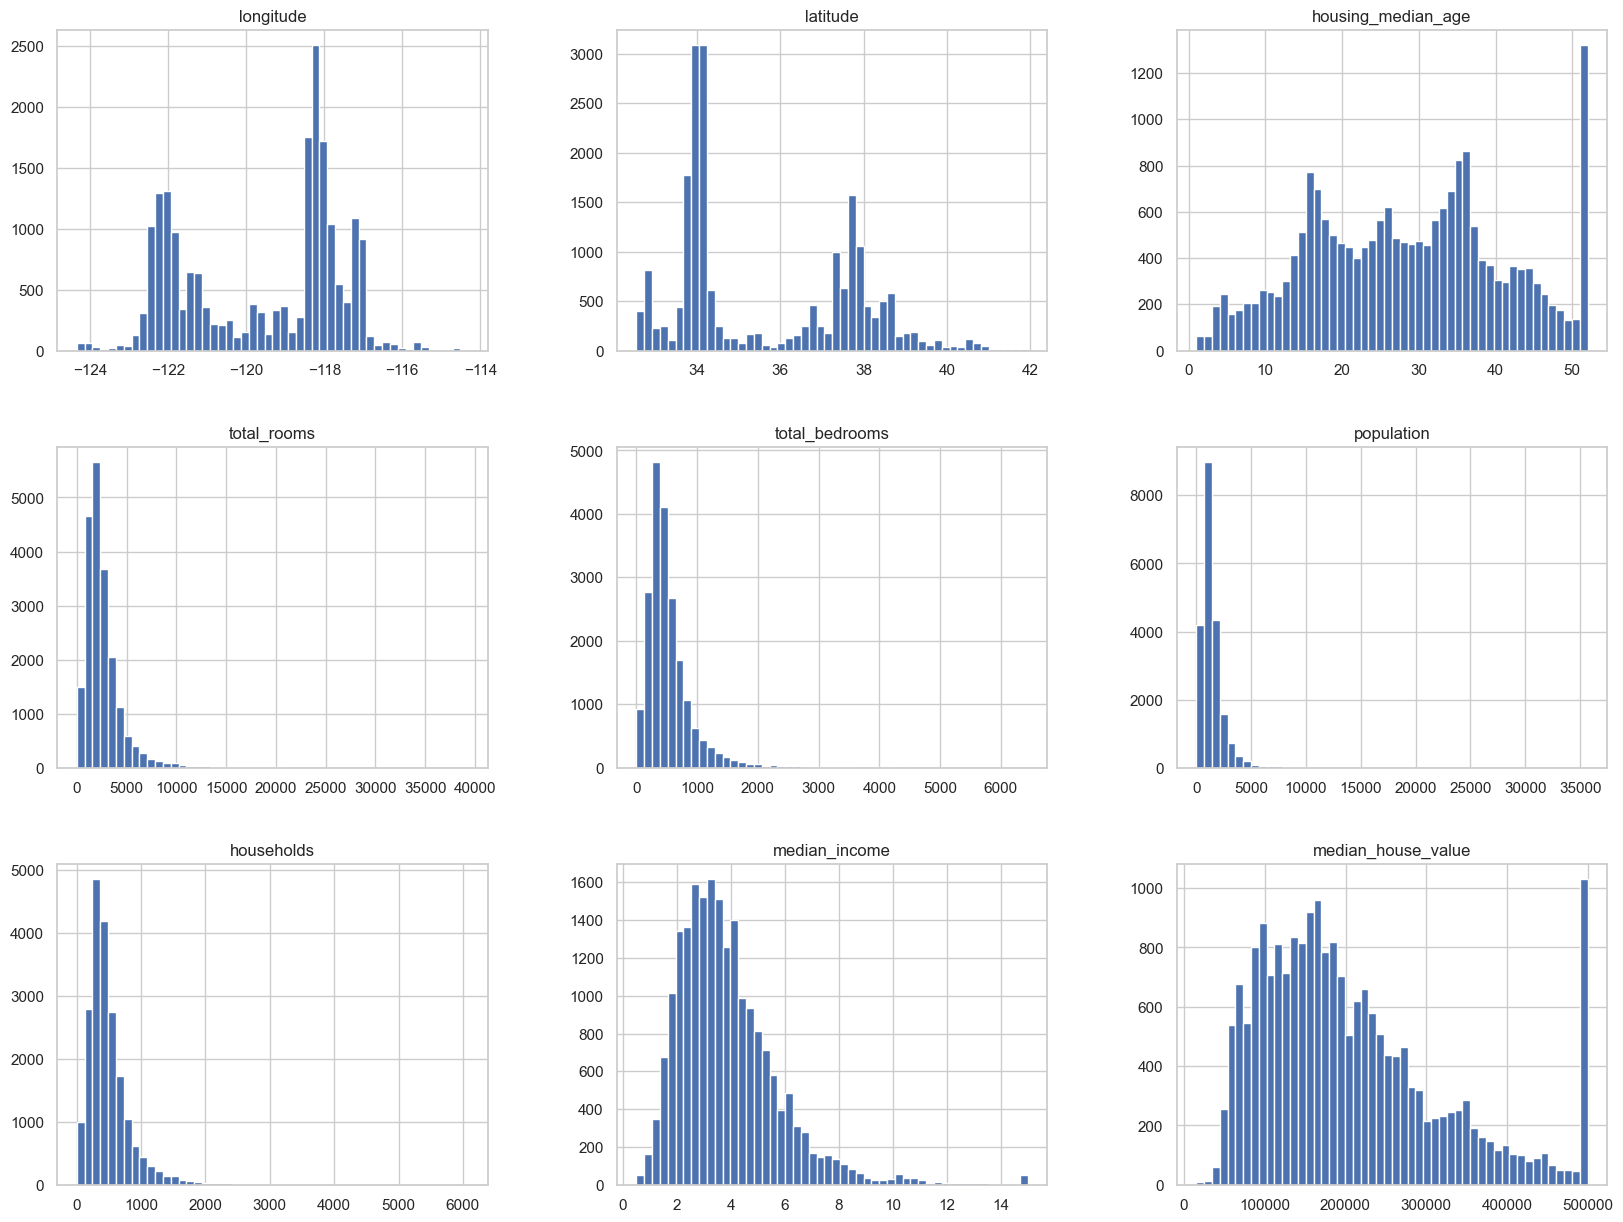

In [181]:
# Drawing histograms for all numerical features (Only ocean_proximity is categorical)
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

#### Feature analysis from histogram plots

In [182]:
# housing_median_age feature analysis
print("Majority of the houses are aged between 15 to 38 years.")
print("The presence of outliers in the 'housing_median_age' is evident from the histogram.")
print("There are 3 distinct peaks in the histogram for 'housing_median_age', one around 5 years, another around 25 years, and a significant peak at 52 years.")
print("We can observe over 1200 houses are 52 years old, indicating a significant number of older houses in the dataset. This shows the highest peak in the histogram")
print("This could suggest that many houses were built around the same time period, possibly due to a housing boom or development phase in that area.")

# median_income feature analysis
median_income_min = round(housing_df['median_income'].min(), 2)
median_income_max = round(housing_df['median_income'].max(), 2)
print(f"The 'median_income' feature ranges from {median_income_min} to {median_income_max}.")
print("The 'median_income' feature is not measured in US dollars. It is scaled at 15 for higher median incomes and 0.5 for lower median incomes.")

# median_house_value feature analysis
print("An odd peak is observed at $500,000 in the 'median_house_value' histogram.")
print("This indicates that there are a significant number of houses valued exactly at $500,000.")
print("As mentioned earlier, this shows the presence of outliers in the dataset, which could potentially skew our regression model if not addressed.")


Majority of the houses are aged between 15 to 38 years.
The presence of outliers in the 'housing_median_age' is evident from the histogram.
There are 3 distinct peaks in the histogram for 'housing_median_age', one around 5 years, another around 25 years, and a significant peak at 52 years.
We can observe over 1200 houses are 52 years old, indicating a significant number of older houses in the dataset. This shows the highest peak in the histogram
This could suggest that many houses were built around the same time period, possibly due to a housing boom or development phase in that area.
The 'median_income' feature ranges from 0.5 to 15.0.
The 'median_income' feature is not measured in US dollars. It is scaled at 15 for higher median incomes and 0.5 for lower median incomes.
An odd peak is observed at $500,000 in the 'median_house_value' histogram.
This indicates that there are a significant number of houses valued exactly at $500,000.
As mentioned earlier, this shows the presence of outl

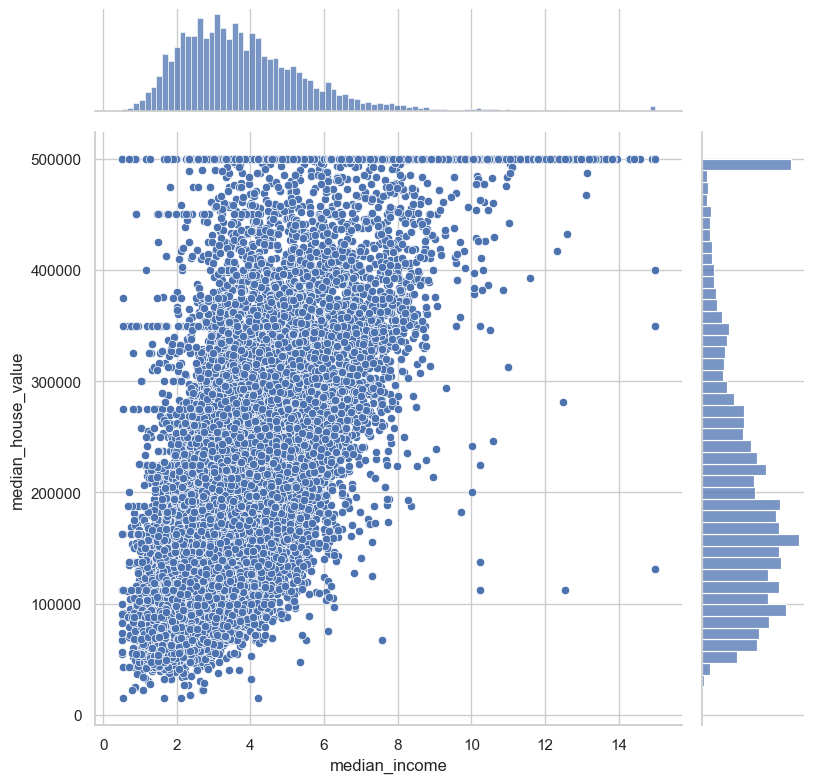

In [183]:
# using seaborn scatter plot, plot the median_house_value vs median_income
sns.jointplot(x="median_income", y="median_house_value", data=housing_df, kind="scatter", height=8, ratio=5, color="b")

#### Data Preprocessing - Remove duplicates if any

In [184]:
data_cleaner = DataCleaner(housing_df)

# Handle duplicates if any
data_cleaner.remove_duplicates()
housing_df = data_cleaner.df

display(housing_df.info())
display(housing_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Data Preprocessing - Handle categorical feature (Ocean_proximity)

In [185]:
# Unique categories in 'ocean_proximity'
ocean_proximity_categories = housing_df['ocean_proximity'].unique()

# Count of each category in 'ocean_proximity'
display(housing_df['ocean_proximity'].value_counts())

# One-hot encoding for 'ocean_proximity' categorical feature
# housing_df = pd.get_dummies(housing_df, columns=['ocean_proximity'], drop_first=True)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

One-hot encoding can cause high cardinality which means as the number of features or columns increases, you can experience the curse of dimentionality.

It is important to consider that as features increases, it makes it harder for the model to learn and generalize. This can increase the training costs.

In [186]:
# Using numbers to indicate categories for 'ocean_proximity'
ocean_proximity_mapping = {
    '<1H OCEAN': 0,
    'INLAND': 1,
    'ISLAND': 2,
    'NEAR BAY': 3,
    'NEAR OCEAN': 4
}
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].map(ocean_proximity_mapping)

# Print the updated dataframe info after feature engineering
display(housing_df.info())
display(housing_df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


#### Data Preprocessing - Handle missing values

In [187]:
# Verify which features have missing values
display(housing_df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [188]:
# Identify numeric features with missing values
features_with_missing_values = data_cleaner.get_features_with_missing_values()
print("Features with missing values:", features_with_missing_values)

for feature in features_with_missing_values:
    # Calculate the percentage of missing values in that feature
    housing_df[feature].isnull().sum()/housing_df.shape[0] * 100
    print(f"Percentage of missing values in {feature}: {housing_df[feature].isnull().sum()/housing_df.shape[0] * 100}%")

housing_df_temp = housing_df[features_with_missing_values]

# Initialize KNNImputer to impute missing values using K=5 
imputer = KNNImputer(n_neighbors=5)
imputer.fit(housing_df_temp)
housing_df[features_with_missing_values] = imputer.transform(housing_df_temp)

# data_cleaner.handle_missing_values(strategy='knn')
# housing_df = data_cleaner.df

imputer = KNNImputer(n_neighbors=5) # Neighbors can be adjusted but should be an odd number
imputer.fit(housing_df_temp)
housing_df[features_with_missing_values] = imputer.transform(housing_df_temp)       

# Verify that there are no more missing values
display(housing_df.isnull().sum())
display(housing_df.info())


Features with missing values: ['total_bedrooms']
Percentage of missing values in total_bedrooms: 1.002906976744186%


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


None

In [189]:
# Verify that there are no more missing values
display(housing_df.isnull().sum())
display(housing_df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


None

#### Use a heatmap to show correlation

In [190]:
# Calculate correlation matrix for numerical columns only
housing_corr = housing_df.select_dtypes(include=['float64', 'int64']).corr()
print(housing_corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
ocean_proximity     -0.289779  0.200974            0.112468    -0.015693   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude 

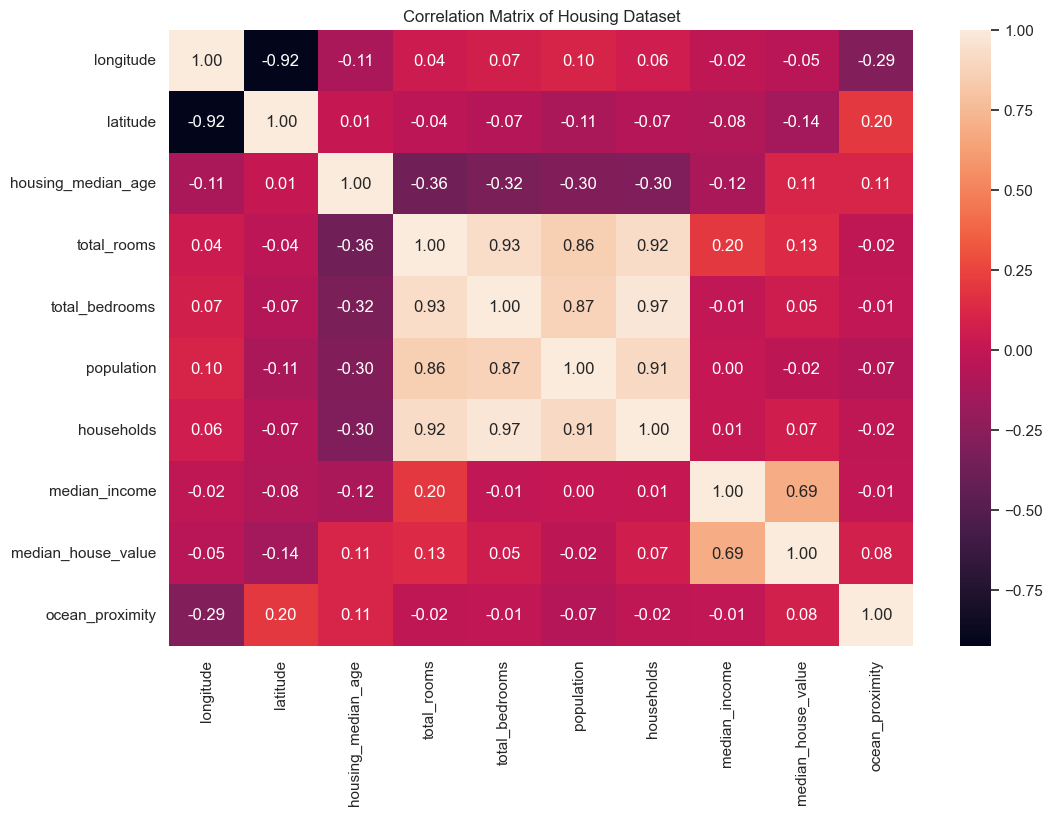

In [191]:
# Plot a graphical correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(housing_corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Housing Dataset')
plt.show()

The heatmap above shows the that several features are highly correlated:
1. total_bedrooms & total_rooms
2. total_bedroms & households
3. population & households 

These features could be candidates for modification or removal

In [192]:
# total_rooms vs total_bedrooms feature engineering. comparing toatl_rooms and total_bedrooms to see which one is more correlated to median_house_value
corr_total_rooms = housing_df['total_rooms'].corr(housing_df['median_house_value'])
corr_total_bedrooms = housing_df['total_bedrooms'].corr(housing_df['median_house_value'])
print(f"\nCorrelation between total_rooms and median_house_value: {corr_total_rooms:.4f}")
print(f"Correlation between total_bedrooms and median_house_value: {corr_total_bedrooms:.4f}")
print("Total_rooms has a higher correlation with median_house_value compared to total_bedrooms. Therefore, total_rooms might be a more significant feature for predicting house values.")
corr_difference = abs(corr_total_rooms) - abs(corr_total_bedrooms)
print(f"The difference in correlation strength is: {corr_difference:.4f}")
if corr_difference < 0.05:
    print("The difference in correlation strength is minimal, indicating that both features have similar predictive power for median_house_value.")
    print("Therefore, the feature with lower correlation can be dropped from the dataset.")
    print("Proceeding to drop the feature with lower correlation from the dataset.")
    if abs(corr_total_rooms) < abs(corr_total_bedrooms):
        housing_df.drop('total_rooms', axis=1, inplace=True)
        print("feature 'total_rooms' dropped.")
    else:
        housing_df.drop('total_bedrooms', axis=1, inplace=True)
        print("feature 'total_bedrooms' dropped.")
else:
    print("The difference in correlation strength is significant, indicating that total_rooms is a more predictive feature for median_house_value compared to total_bedrooms.")
    print("Therefore, total_bedrooms feature might be redundant and can be dropped from the dataset.")
    print("Proceeding to drop total_bedrooms feature from the dataset.")
    housing_df.drop('total_bedrooms', axis=1, inplace=True)
    print("feature 'total_bedrooms' dropped.")

# total_rooms & households feature engineering. comparing total_rooms and households to see which one is more correlated to median_house_value
corr_total_rooms = housing_df['total_rooms'].corr(housing_df['median_house_value'])
corr_households = housing_df['households'].corr(housing_df['median_house_value'])
print(f"\nCorrelation between total_rooms and median_house_value: {corr_total_rooms:.4f}")
print(f"Correlation between households and median_house_value: {corr_households:.4f}")
print("Households has a higher correlation with median_house_value compared to total_rooms. Therefore, households might be a more significant feature for predicting house values.")
corr_difference = abs(corr_households) - abs(corr_total_rooms)
print(f"The difference in correlation strength is: {corr_difference:.4f}")
if corr_difference < 0.05:
    print("The difference in correlation strength is minimal, indicating that both features have similar predictive power for median_house_value.")
    print("Therefore, the feature with lower correlation can be dropped from the dataset.")
    print("Proceeding to drop the feature with lower correlation from the dataset.")
    if abs(corr_households) < abs(corr_total_rooms):
        housing_df.drop('households', axis=1, inplace=True)
        print("feature 'households' dropped.")
    else:
        housing_df.drop('total_rooms', axis=1, inplace=True)
        print("feature 'total_rooms' dropped.")
else:
    print("The difference in correlation strength is significant, indicating that households is a more predictive feature for median_house_value compared to total_rooms.")
    print("Therefore, total_rooms feature might be redundant and can be dropped from the dataset.")
    print("Proceeding to drop total_rooms feature from the dataset.")
    housing_df.drop('total_rooms', axis=1, inplace=True)
    print("feature 'total_rooms' dropped.")


Correlation between total_rooms and median_house_value: 0.1342
Correlation between total_bedrooms and median_house_value: 0.0495
Total_rooms has a higher correlation with median_house_value compared to total_bedrooms. Therefore, total_rooms might be a more significant feature for predicting house values.
The difference in correlation strength is: 0.0847
The difference in correlation strength is significant, indicating that total_rooms is a more predictive feature for median_house_value compared to total_bedrooms.
Therefore, total_bedrooms feature might be redundant and can be dropped from the dataset.
Proceeding to drop total_bedrooms feature from the dataset.
feature 'total_bedrooms' dropped.

Correlation between total_rooms and median_house_value: 0.1342
Correlation between households and median_house_value: 0.0658
Households has a higher correlation with median_house_value compared to total_rooms. Therefore, households might be a more significant feature for predicting house values

<Axes: >

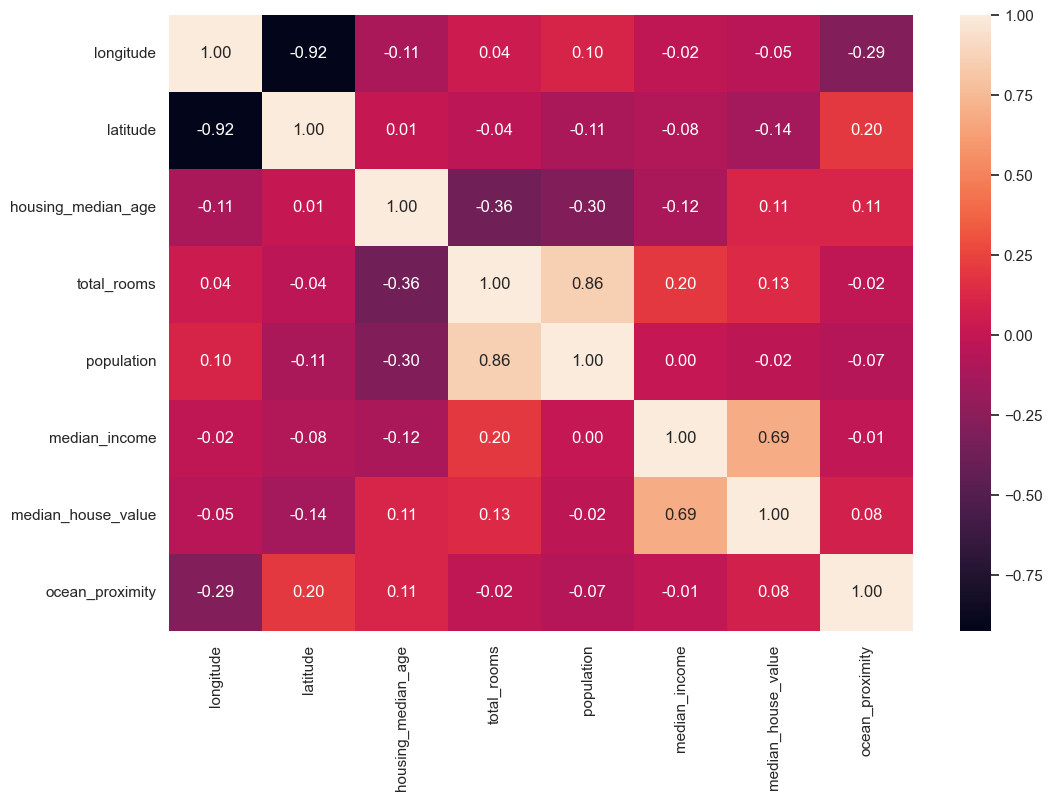

In [193]:
# Correlation heatmap after handling missing values and removing highly correlated features
housing_corr = housing_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(housing_corr, annot=True, fmt=".2f")

As you can see in the headmap above, the highly correlated features no longer exist.

#### Feature Engineering

In [194]:
# Creating a new feature combining longitude and latitude - Standard format "longitude, latitude" and delete the original columns
# The below code is commented out because I am trying to keep numerical features for linear regression model.
# housing_df['location'] = housing_df['longitude'].astype(str) + ", " + housing_df['latitude'].astype(str)
#housing_df.drop(['longitude', 'latitude'], axis=1, inplace=True)

#### Train and Test split

#### Define a Model

#### Train the Model

#### Evaluate the Model

#### Testing the model

#### Talking points

About **Correlation Heatmap**:
1. Duplicate features (if any) should be removed to speed up the training process to savee time, energy, and money. It can also improve the model's prediction capabilities.
2. Highly corellated features could possibly teach the model similar things.
3. In each cell, expect values from 0 to 1. Values closer to 0 show a low correlation while values closer to 1 show high correlation.
4. The diagnol line from top left to bottom right of the heatmap with value of 1 showing perfect match. This is due to the fact that features are being compared to themselves. 
5. We expect the heatmap to be symmetrical where the bottom left is the same as the top right with each feature positively correlated with the other.

**Dimensionality** reduction is the act of removing features to improve the runtime and effectiveness of your model 

**Correlation Heatmap** is used to identify the highly related features. When two features are highly correlated to each other, one of them could be candidate for removal. 

Another usecase of **Correlation Heatmap** is to check the correlation of each feature with the target feature. In this case, we could identify the features that are highly correlated to the target feature and the ones with similar correlation could be candidate for removal.

**Feature Engineering** is a process that manipulates the data by adding, deleting, combining, and creating new features to improve training adn prediction capabilities. Feature engineering is an art that requires you to fully understand the data and the relationships between feature.

**KNN** is a Machine Learning algorithm and it stands for k-Nearest Neighbor. It assumes that similar datapoints exist in close proximity. KNN does not learn anything in training phase, instead, it memorizes the whole dataset. In prediction phase, it calculate the distances between each data points in the dataset and a mystery datapoints. It then determines the mystery point's value by voting (for categories) or averaging (for numbers) based on the k-closest neighbors. One usecase for KNN is to fill the missing values. 

A machine learning algorithm or learning algorithm for short, studies the dataset and find trends and patterns during the training process. During the training process, the machine makes multiple passes or iterations over the training data. These iterations are called **Epochs**. The trends and patterns uncovered by the learning algorithm are stored in a mathematical model or simply called the model. The number of epochs is a critical parameter called **Hyperparameter** to the training process that can result in a better performing model.

Once training is completed, a **Loss function** is used to measure how good the model is at predicting the expected value. In simple terms, a loss function measures how far an estimated value is from its actual value. The model made predictions and we can evaluate it because we used labeled dataset. Labeled data already has the target you want the machine learning model to leart how to predict. 

**Loss function** is mainly used to optimize training not for overal judge of performance

%80 of the data is used for training called the training dataset and %20 of the remaining is used for evaluating the model's performance. The model is judged on the data it hasn't seen before. 

Standard evaluation metrics include:
    - Mean squared error (MSE)
    - Accuracy
    - F1 score
    - AUC
    - R^2

The metric value is a key indicator of whether or not you need to tweak **hyperparamets** and start the training process again to improve performance 

**Linear Regression** is used to:
    - Solve regression problems
    - Is used to predict numeric values 

Linear equation establishes relationship between independent and dependednt variables or features by fitting a reggression line 